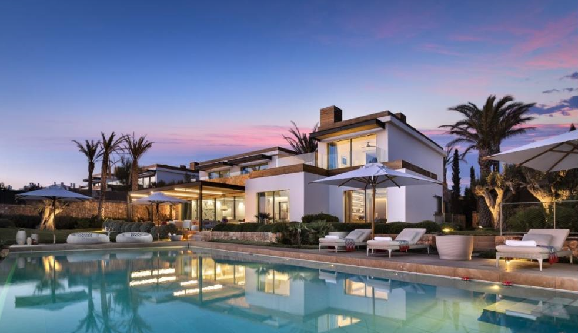


# Importamos
pandas, matplotlib, seaborn, numpy, scipy.
# Suprimimos 
Una advertencia de una llamada de función específica usando un administrador de contexto.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Leemos el archivo train dentro de la misma carpeta

In [2]:
df_train = pd.read_csv('train.csv')

# Mostramos las primeras 5 filas

In [3]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Mostramos todas las columnas para ver cuales son importantes

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Dimensión de la tabla

In [5]:
df_train.shape

(1460, 81)

# Hacemos una lista con precio de venta y el terreno

In [6]:
df_train[['SalePrice','GrLivArea']]

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
...,...,...
1455,175000,1647
1456,210000,2073
1457,266500,2340
1458,142125,1078


# Precio de venta promedio

In [7]:
df_train['SalePrice'].mean()

180921.19589041095

# Descripción de precio de venta

In [8]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Histograma
distplot() traza una distribución univariada de puntos combinando la función matplotlib hist con las funciones seaborn kdeplot() y rugplot() 

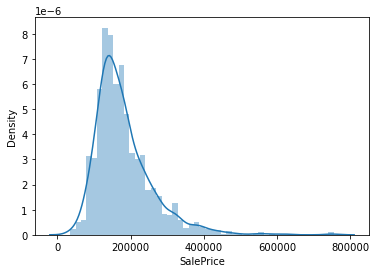

In [9]:
sns.distplot(df_train['SalePrice']);

Tenemos una asimetría de la distribución de probabilidad con respecto a su media. El sesgo positivo indica que la cola está en el lado derecho. Presenta concentración de datos hacia la derecha lo que nos indica una curtosis positiva.

In [10]:
df_train['SalePrice'].skew()

1.8828757597682129

In [11]:
df_train['SalePrice'].kurt()

6.536281860064529

# skew()
 La función skewtest se puede utilizar para determinar la asimetría de los datos presentes en un eje dado.
# Asimetría
Para distribuciones continuas unimodales, un valor de asimetría mayor que cero significa que hay más peso en la cola derecha de la distribución.
# kurt()
Calcula la curtosis para un conjunto de valores en un eje específico
# Curtosis
La curtosis positiva indica que los datos presentan valores atípicos más extremos que una distribución normal y es leptocúrtica.

# Relación entre precio de venta y pies cuadrados de construcción

In [12]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

axis=1 . El eje a lo largo del cual concatenar (a traves de las columnas)

# Mostramos la concatenación Precio de venta vs pies cuadrados de construcción

In [13]:
data.head(10)

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
5,143000,1362
6,307000,1694
7,200000,2090
8,129900,1774
9,118000,1077


# Para este análisis podemos inferir cuales son los parámetros más importantes a tomar en cuenta que influyen directamente en el precio de venta.
-Pies cuadrados de contrucción: (GrLivArea)

-Área total del sótano en pies cuadrados: (TotalBsmtSF)

-Ponderación de cálidad: debido a que este es un parámetro del 1 al 10 en relación a la calidad como pueden ser acceso a servicios, seguridad entre otros, este es un parámetro subjetivo dependiendo de quien contesta la encuesta o un experto, lo tomaremos en cuneta de todos modos: (OverallQual)

-Año de construcción: (YearBuilt)

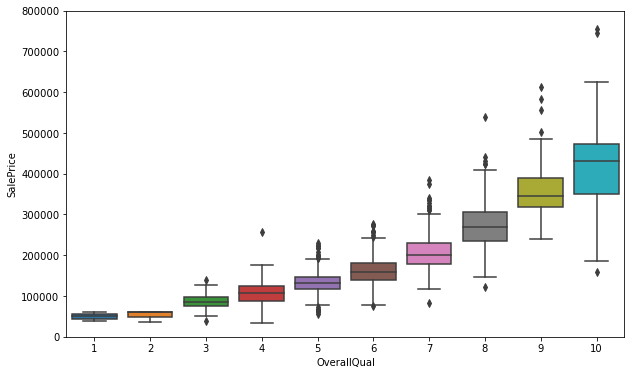

In [14]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Podemos notar que se tienen casas con una puntuación de 10 pero la variación de precio está entre los 200,000 dls y los 600,000 dls.

# Generaremos un gráfico de disperción con Precio de venta vs pies cuadrados de construcción

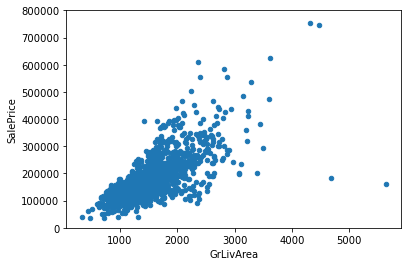

In [15]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# Generaremos un gráfico de disperción con Precio de venta vs Área total del sótano en pies cuadrados

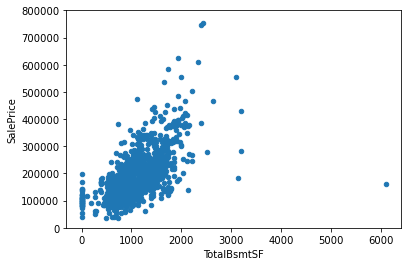

In [16]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

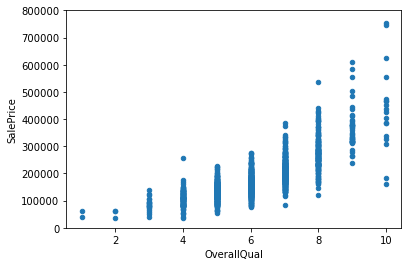

In [17]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

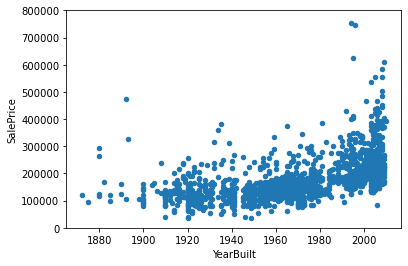

In [18]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

GrLivArea' y 'TotalBsmtSF' están linealmente relacionados con 'SalePrice'.Para 'TotalBsmtSF' la pendiente de la relación lineal es alta, con'OverallQual' y 'YearBuilt' también parecen estar relacionados con 'SalePrice'.
La relación entre 'OverallQual' y 'SalePrice' es más fuerte pero como es una variable subjetiva dependiendo de quien evalua, realizaremos un análisis más objetivo.

# Matríz de correlación (heatmap)
Nos mustra la relación que existe entre todas las variables, las que nos interesan más son las que se relacionan con precio de venta.

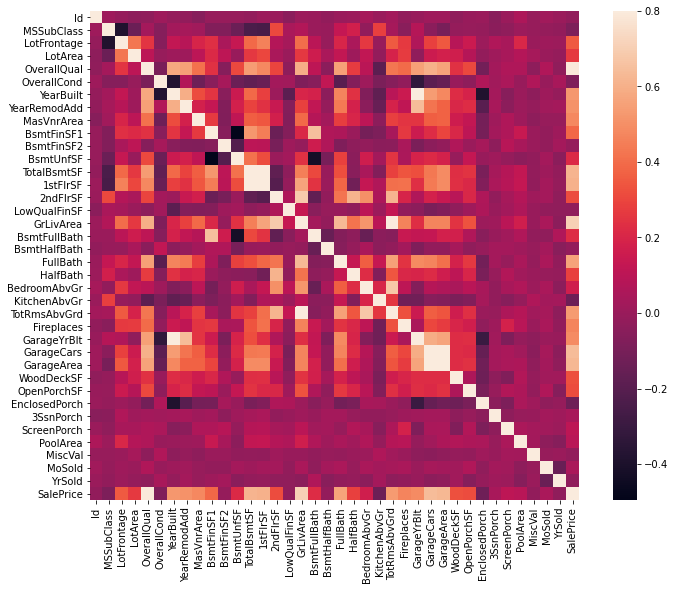

In [19]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Esto nos muestra que entre más claro sea mayor es la correlacion con precio de venta tendrá esa variable.

# Matriz de correlación (números)

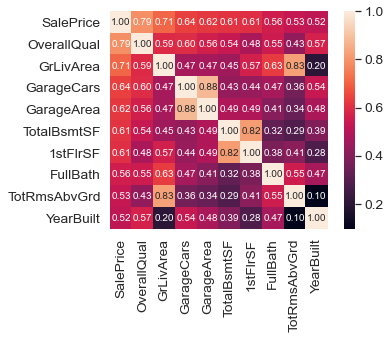

In [20]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Las variables más correlacionadas con Precio de venta son:
OverallQual, GrLivArea, TotalBsmtSF, GarageCars, YearBuilt

# Scatter Plots de las variables correlacionadas y precio de venta

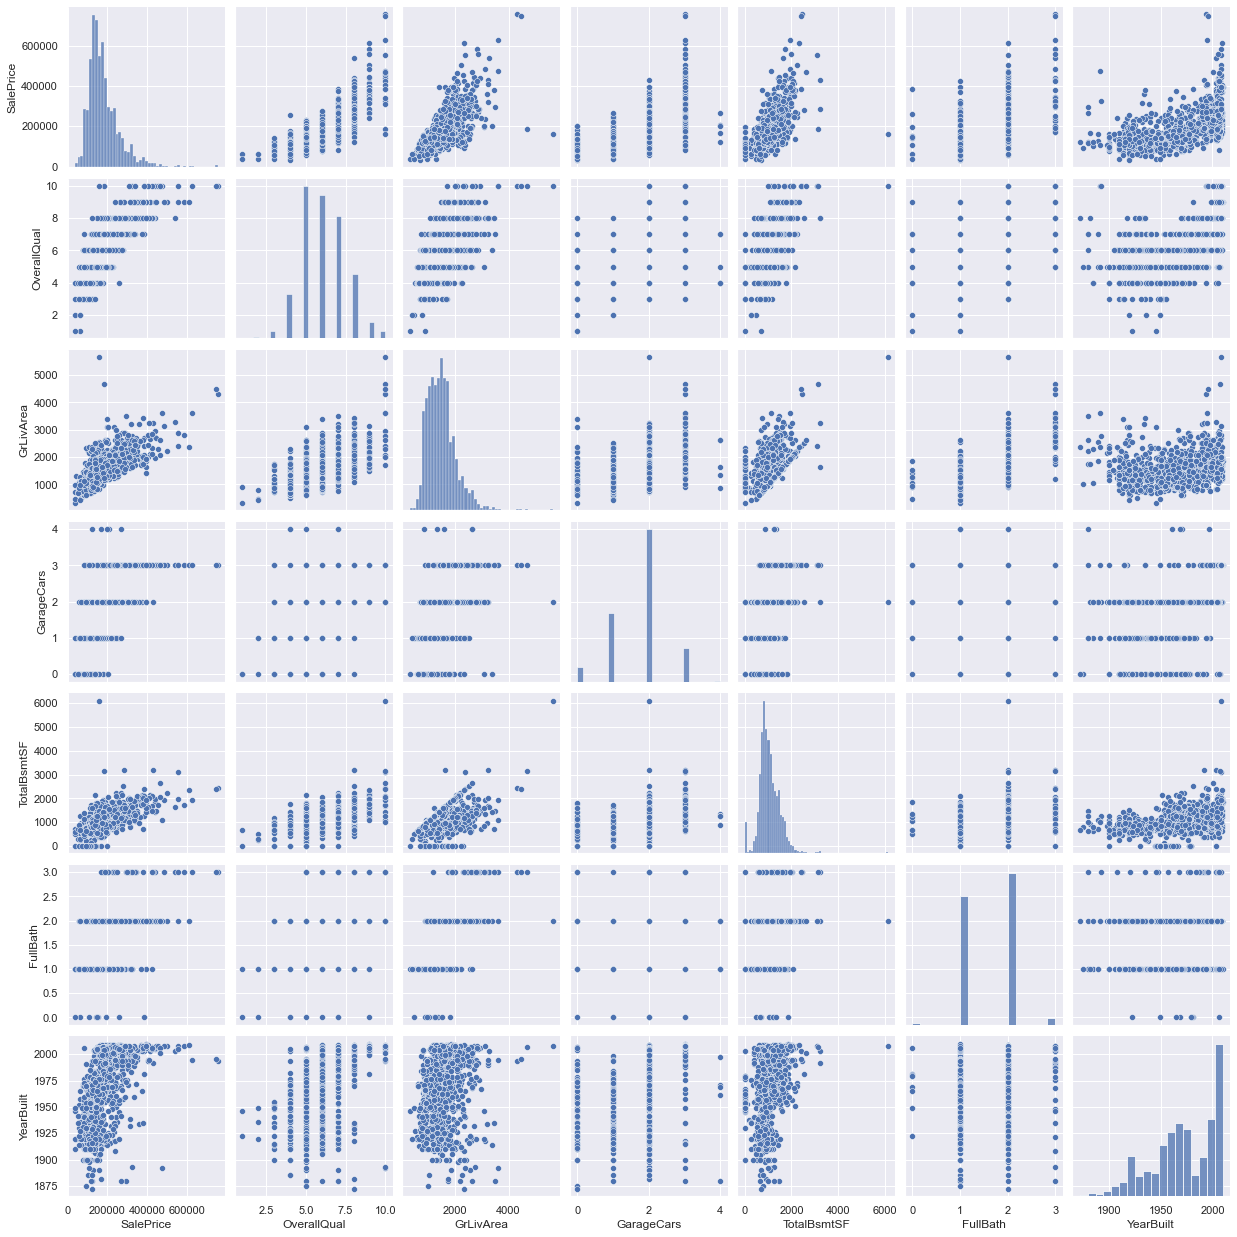

In [21]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

# Relaciones 
- Entres TotalBsmtSF y GrLiveArea se pueden ver los puntos formando una línea lineal como un borde y la mayoría de datos están por debajo de esta linea.
- SalePrice' y 'YearBuilt forman una tendencia exponencial

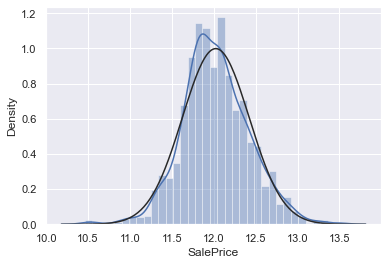

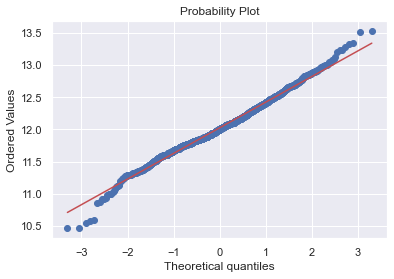

In [22]:
#aplicando transformación de registro
df_train['SalePrice'] = np.log(df_train['SalePrice'])

#histograma transformado y diagrama de probabilidad normal
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

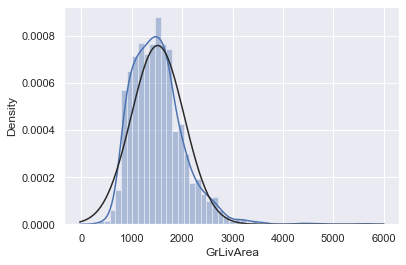

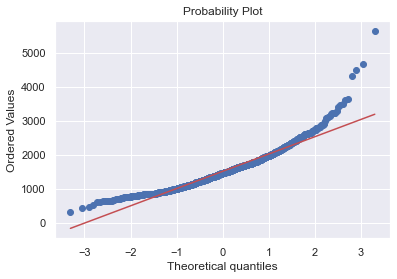

In [23]:
#histograma y gráfico de probabilidad normal
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

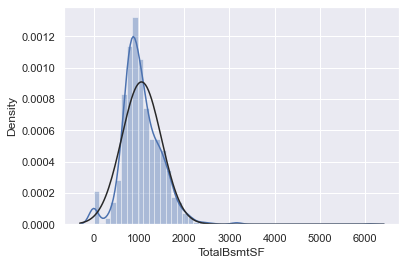

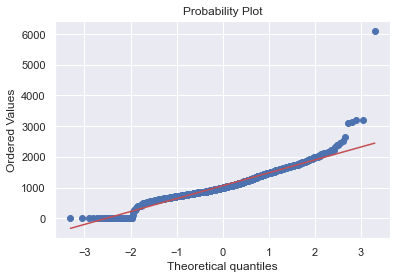

In [24]:
# histograma y gráfico de probabilidad normal
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

 Podemos intuir que las variables más relacionadas con el precio de venta son: 
* TotalBsmtSF 
* GrLiveArea 
* YearBuilt 